## DS4200 Group Project: Comparing Tesla Stock and Weather Data
Group members: Emma Rabbath, Beth Farr, Anya Solanki, Charlotte Thunen


In [16]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
## Load all data into separate weather and tesla dfs
# Weather Data
# File path
file_path = "GroupProject/Austin_Weather_Data/"
# List of files
files = [
    "Austin_Texas_2014-09-15_2017-06-09.csv",
    "Austin_Texas_2017-06-10_2019-03-24.csv",
    "Austin_Texas_2019-03-25_2021-12-18.csv",
    "Austin_Texas_2021-12-19_2024-09-13.csv"
]

# Full file paths
file_paths = [os.path.join(file_path, file) for file in files]

# Combine all files into one df
df_list = [pd.read_csv(file) for file in file_paths]
weather_df = pd.concat(df_list, ignore_index=True)

# Tesla Data
tesla_df = pd.read_csv("GroupProject/Tesla_Stock_Data/Tesla_Stock_2014-09-15_2024_09_13.csv")


In [5]:
## Cleaning data
# Convert weather_df "datetime" to datetime object
weather_df['datetime'] = pd.to_datetime(weather_df['datetime'])

# Convert tesla_df "date" to datetime object
tesla_df['datetime'] = pd.to_datetime(tesla_df['Date'], format='%m/%d/%Y')

# Remove special symbols from each column in tesla_df
tesla_df['Close/Last'] = tesla_df['Close/Last'].replace({'\$': '', ',': ''}, regex=True).astype(float)
tesla_df['Open'] = tesla_df['Open'].replace({'\$': '', ',': ''}, regex=True).astype(float)
tesla_df['High'] = tesla_df['High'].replace({'\$': '', ',': ''}, regex=True).astype(float)
tesla_df['Low'] = tesla_df['Low'].replace({'\$': '', ',': ''}, regex=True).astype(float)

# Set datetime as index to merge the dataframes
weather_df.set_index('datetime', inplace=True)
tesla_df.set_index('datetime', inplace=True)

# Combine all data into one df
combined_df = weather_df.join(tesla_df, how='inner')

# Drop unnecessary columns
cols_to_drop = ["precipprob", "precipcover", "snow", "snowdepth", "winddir", "sealevelpressure", 
                "solarradiation", "solarenergy", "severerisk", "moonphase", "stations", "Date"]
combined_df.drop(columns=cols_to_drop, inplace=True)

In [14]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2014-09-15 to 2024-09-13
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          2517 non-null   object 
 1   tempmax       2517 non-null   float64
 2   tempmin       2517 non-null   float64
 3   temp          2517 non-null   float64
 4   feelslikemax  2517 non-null   float64
 5   feelslikemin  2517 non-null   float64
 6   feelslike     2517 non-null   float64
 7   dew           2517 non-null   float64
 8   humidity      2517 non-null   float64
 9   precip        2517 non-null   float64
 10  preciptype    721 non-null    object 
 11  windgust      2499 non-null   float64
 12  windspeed     2517 non-null   float64
 13  cloudcover    2517 non-null   float64
 14  visibility    2517 non-null   float64
 15  uvindex       2463 non-null   float64
 16  sunrise       2517 non-null   object 
 17  sunset        2517 non-null   object 
 18  conditions

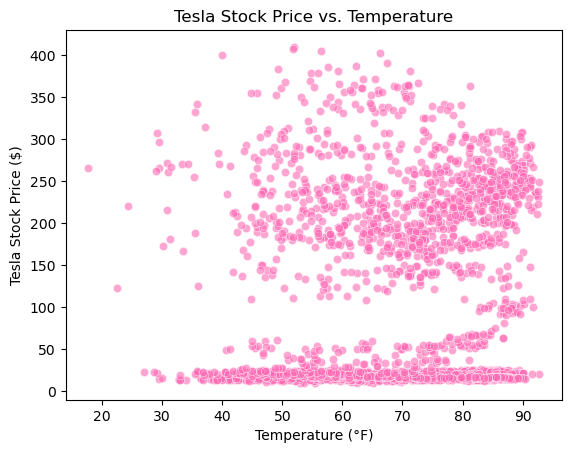

In [20]:
## Create a scatterplot with Tesla Stock Price on Y-axis, and Weather temp on the X-axis
sns.scatterplot(data=combined_df, x="temp", y="Close/Last", color ="hotpink", alpha=0.6)
plt.title("Tesla Stock Price vs. Temperature")
plt.xlabel("Temperature (°F)")
plt.ylabel("Tesla Stock Price ($)")
plt.show()

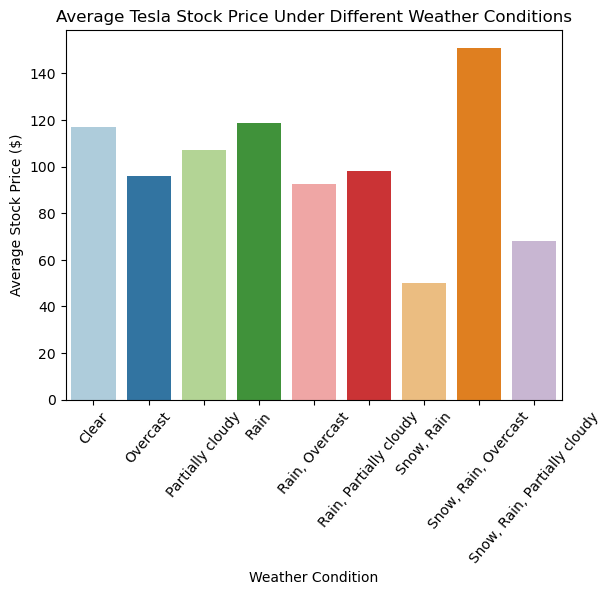

In [50]:
## Create a bar chart showing Tesla's stock performance under different weather conditions

# Calculate average stock price for each weather condition
avg_stock_price_by_weather = combined_df.groupby('conditions')['Close/Last'].mean().reset_index()

# Create Bar Plot
sns.barplot(data=avg_stock_price_by_weather, x='conditions', y='Close/Last', palette='Paired')
plt.title("Average Tesla Stock Price Under Different Weather Conditions")
plt.xlabel("Weather Condition")
plt.ylabel("Average Stock Price ($)")
plt.xticks(rotation=45) # rotate labels for readability
plt.show()